In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
country_etfs = {
    "Argentina": "ARGT",
    "ASEAN": "ASEA",
    "Australia": "EWA",
    "Austria": "EWO",
    "Belgium": "EWK",
    "Emerging Markets": "VWO",
    "Brazil": "EWZ",
    "Canada": "EWC",
    "Chile": "ECH",
    "China": "GXC",
    "Colombia": "GXG",
    "Denmark": "EDEN",
    "Egypt": "EGPT",
    "Finland": "EFNL",
    "France": "EWQ",
    "Germany": "EWG",
    "Greece": "GREK",
    "Hong Kong": "EWH",
    "India": "PIN",
    "Indonesia": "IDX",
    "Ireland": "EIRL",
    "Israel": "EIS",
    "Italy": "EWI",
    "Japan": "EWJ",
    "Malaysia": "EWM",
    "Mexico": "EWW",
    "Netherlands": "EWN",
    "New Zealand": "ENZL",
    "Norway": "NORW",
    "Peru": "EPU",
    "Philippines": "EPHE",
    "Poland": "EPOL",
    "Portugal": "PGAL",
    "Qatar": "QAT",
    "Saudi Arabia": "KSA",
    "Singapore": "EWS",
    "South Africa": "EZA",
    "South Korea": "EWY",
    "Spain": "EWP",
    "Sweden": "EWD",
    "Switzerland": "EWL",
    "Taiwan": "EWT",
    "Thailand": "THD",
    "Turkey": "TUR",
    "United Kingdom": "EWU",
    "UAE": "UAE",
    "S&P 500": "SPY",
    "Nasdaq": "QQQ",
    "Dow Jones": "DIA",
    "Russell 2000": "IWM",
    "World": "VT",
    "Vietnam": "VNM"
}


In [3]:
def get_etf_data(etfs):
    df = pd.DataFrame()

    for country, ticker in etfs.items():
        data = yf.Ticker(ticker)
        history = data.history(period="1y")
        history['Country'] = country
        history['Ticker'] = ticker  # Added ticker
        df = df.append(history)

    return df


In [4]:
data_df = get_etf_data(country_etfs)

# Set pandas display options for decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data_df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Country,Ticker
Date,,,,,,,,,,
2022-07-01 00:00:00-04:00,24.04,24.83,24.04,24.83,6800,0.00,0.00,0.00,Argentina,ARGT
2022-07-05 00:00:00-04:00,24.10,24.50,23.74,24.50,5500,0.00,0.00,0.00,Argentina,ARGT
2022-07-06 00:00:00-04:00,24.51,24.52,24.26,24.33,2300,0.00,0.00,0.00,Argentina,ARGT
2022-07-07 00:00:00-04:00,24.70,25.00,24.70,24.75,4400,0.00,0.00,0.00,Argentina,ARGT
2022-07-08 00:00:00-04:00,24.64,24.74,24.45,24.65,2900,0.00,0.00,0.00,Argentina,ARGT
2022-07-11 00:00:00-04:00,24.12,24.25,23.70,23.75,13800,0.00,0.00,0.00,Argentina,ARGT
2022-07-12 00:00:00-04:00,23.62,23.75,23.42,23.49,22100,0.00,0.00,0.00,Argentina,ARGT
2022-07-13 00:00:00-04:00,23.15,23.88,23.15,23.73,4700,0.00,0.00,0.00,Argentina,ARGT
2022-07-14 00:00:00-04:00,22.84,23.25,22.84,23.07,2100,0.00,0.00,0.00,Argentina,ARGT


In [5]:
def calculate_returns(df):
    return_df = pd.DataFrame(columns=["Country", "Ticker", "1 Week", "1 Month", "3 Months", "YTD", "Since Inception"])

    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        ticker = country_data['Ticker'].iloc[0]  # Modified this line

        returns = country_data["Close"].pct_change()
        week_return = returns[-5:].mean() * 5
        month_return = returns[-21:].mean() * 21
        three_month_return = returns[-63:].mean() * 63
        ytd_return = returns.sum()
        inception_return = (country_data["Close"][-1] - country_data["Close"][0]) / country_data["Close"][0]

        return_df = return_df.append({
            "Country": country,
            "Ticker": ticker,
            "1 Week": week_return,
            "1 Month": month_return,
            "3 Months": three_month_return,
            "YTD": ytd_return,
            "Since Inception": inception_return,
        }, ignore_index=True)

    return return_df


In [6]:
returns_df = calculate_returns(data_df)

# Sort dataframe by 'YTD' column
sorted_returns_df = returns_df.sort_values('YTD', ascending=True)

In [7]:
sorted_returns_df.head(10)

,Country,Ticker,1 Week,1 Month,3 Months,YTD,Since Inception
9,China,GXC,0.01,0.04,-0.10,-0.15,-0.18
33,Qatar,QAT,0.01,0.01,0.03,-0.09,-0.10
17,Hong Kong,EWH,0.01,0.04,-0.05,-0.09,-0.10
24,Malaysia,EWM,-0.00,-0.01,-0.08,-0.06,-0.07
10,Colombia,GXG,0.02,0.11,0.12,-0.06,-0.09
21,Israel,EIS,-0.02,0.03,0.01,-0.06,-0.08
51,Vietnam,VNM,-0.02,0.07,0.09,-0.05,-0.07
28,Norway,NORW,0.03,0.05,-0.01,-0.02,-0.06
19,Indonesia,IDX,0.01,0.02,0.02,-0.02,-0.03
45,UAE,UAE,0.00,0.03,0.07,-0.01,-0.03


In [8]:
def draw_table(df):
    fig = plt.figure(figsize=(10,20), dpi=300, facecolor='#EFE9E6')
    ax = plt.subplot()

    ncols = len(df.columns)  # Adjust the number of columns to match DataFrame
    nrows = df.shape[0]

    ax.set_xlim(0, ncols + 1)
    ax.set_ylim(0, nrows * 2 + 1)

    positions = np.linspace(0.5, ncols-0.5, ncols)  # Adjust the number of positions to match DataFrame
    offsets = [0.50 if c == 'Country' else 0 for c in df.columns]  # Create offsets for 'Country' column

    columns = df.columns

    for i in range(nrows):
        for j, column in enumerate(columns):
            if j == 0:
                ha = 'left'
            else:
                ha = 'center'
            value = df[column].iloc[i]
            if isinstance(value, float):
                text_label = f'{value*100:.2f}%'
            else:
                text_label = f'{value}'
            weight = 'normal'
            ax.annotate(
                xy=(positions[j]-offsets[j], i*2 + 1),  # Adjust position by offset
                text=text_label,
                ha=ha,
                va='center',
                weight=weight
            )

    for index, c in enumerate(columns):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index]-offsets[index], nrows*2 + 0.75),  # Adjust position by offset
            text=columns[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows*2, nrows*2], lw=1.5, color='black', marker='', zorder=4)
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
    for x in range(2, nrows*2, 2):
        ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

    ax.fill_between(
        x=[0,1.3],  # Further adjust the right boundary of the shaded area
        y1=nrows*2,
        y2=0,
        color='lightgrey',
        alpha=0.5,
        ec='None'
    )

    ax.set_axis_off()

    fig.text(
        x=0.15, y=.89,
        s='ETF Country Data',
        ha='left',
        va='bottom',
        weight='bold',
        size=12
    )
    plt.show()


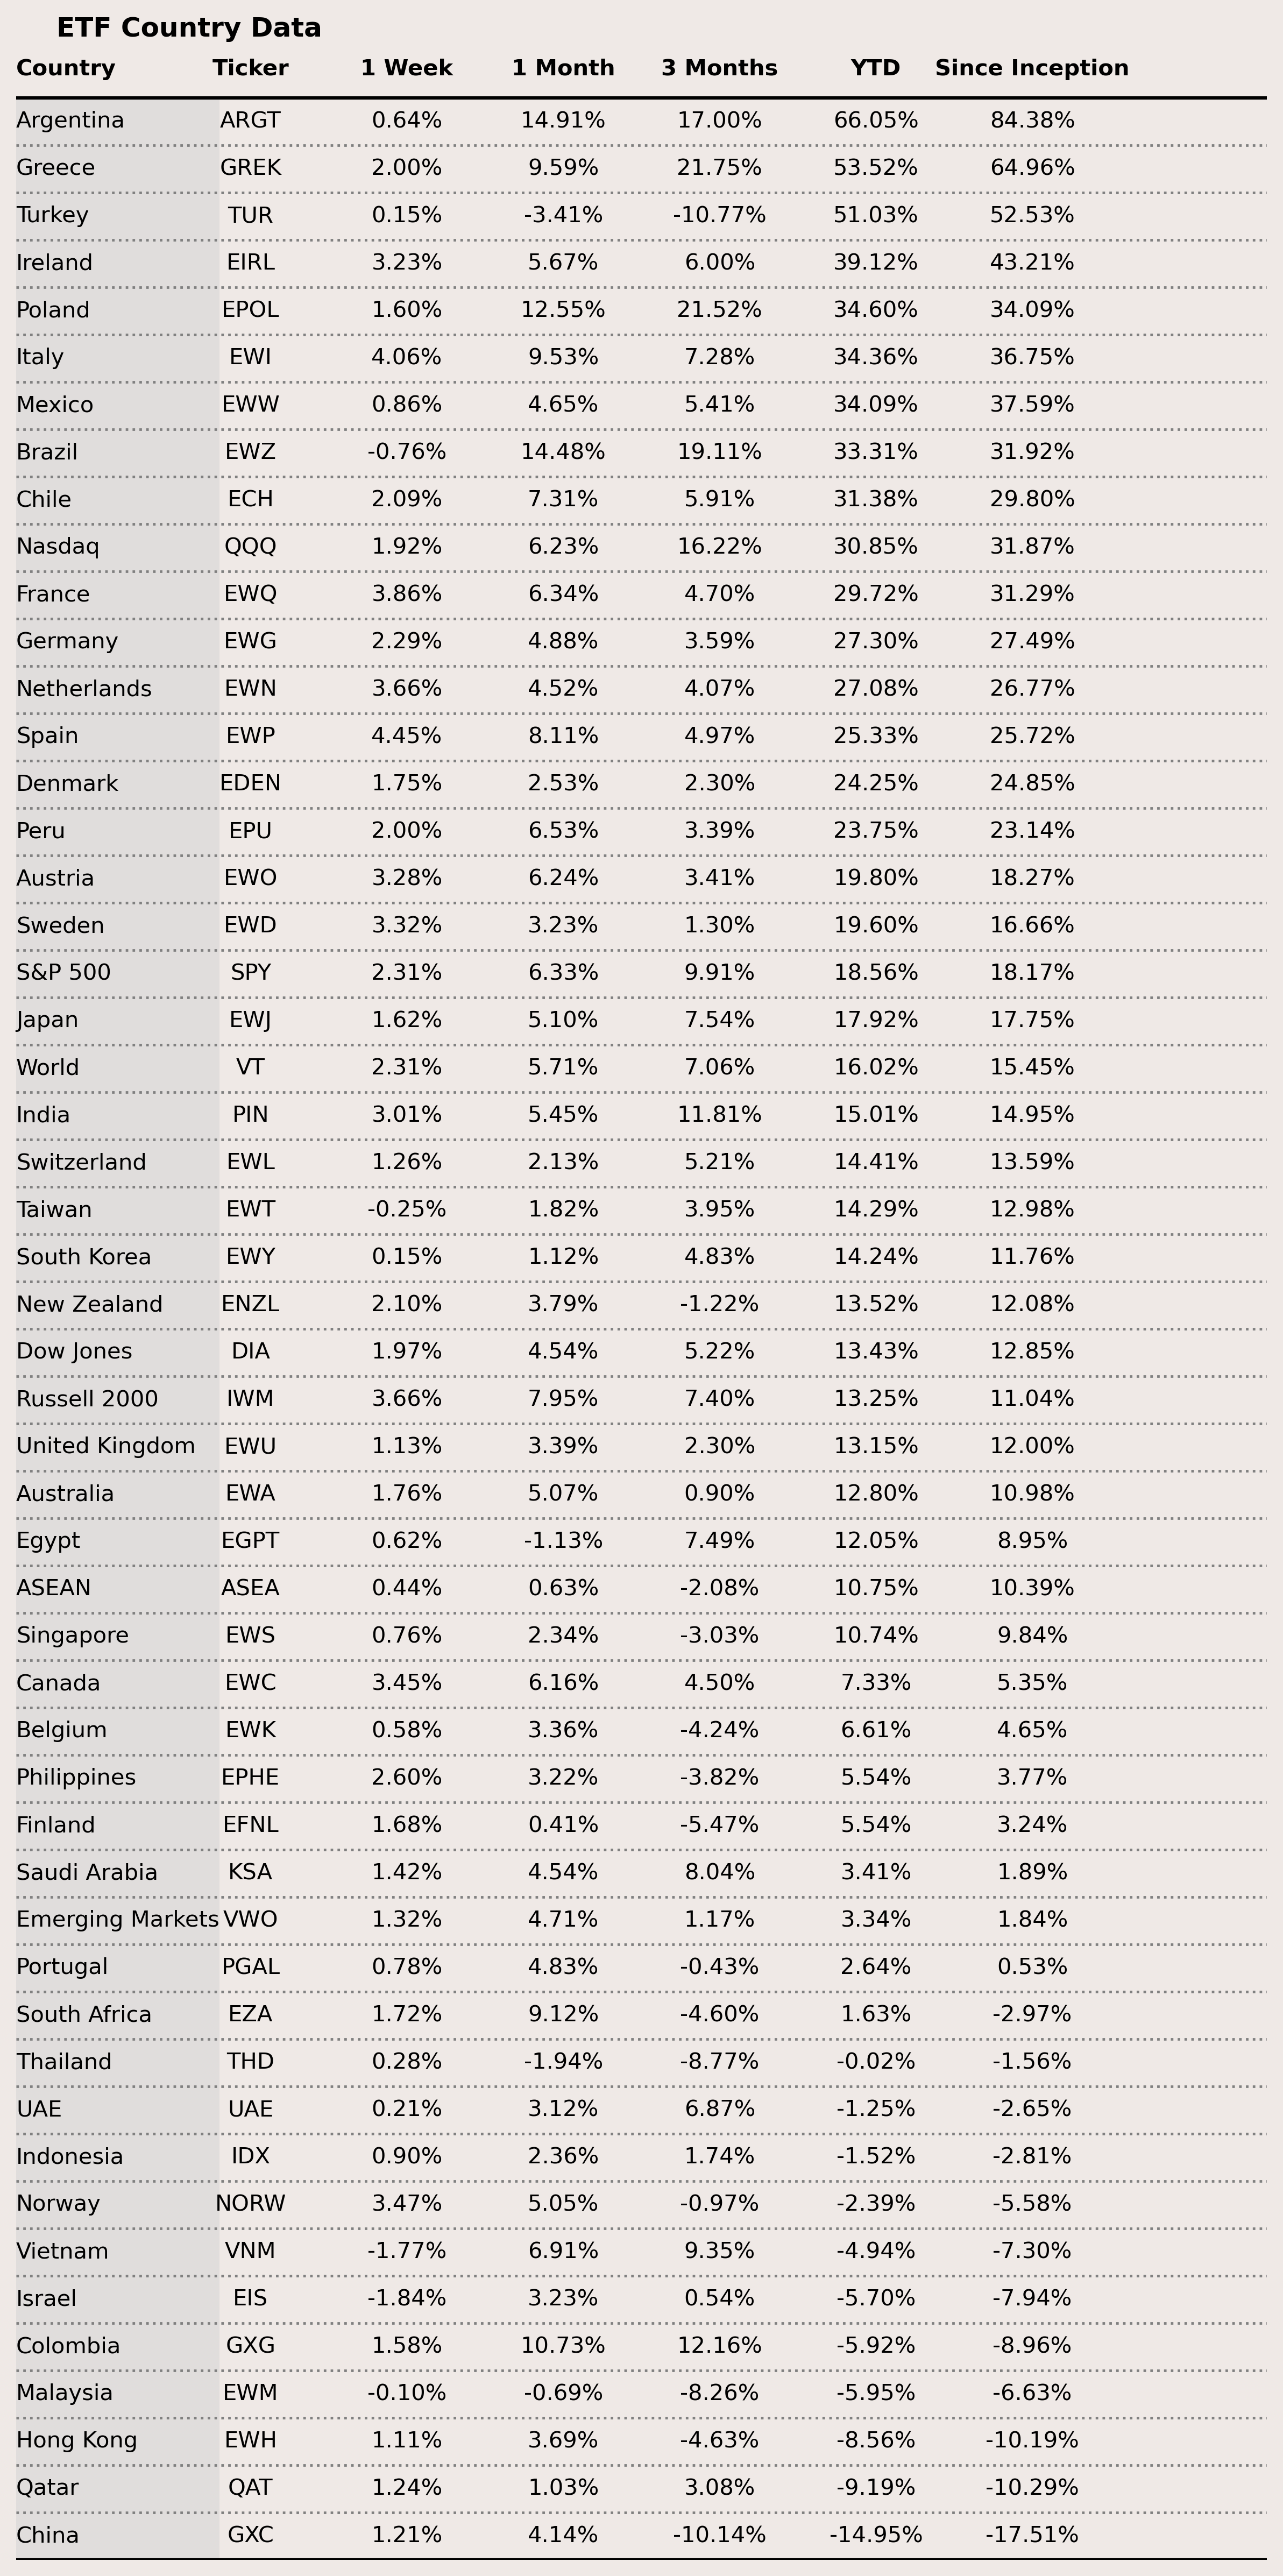

In [9]:
# Now you can draw your table
draw_table(sorted_returns_df)

In [27]:
def calculate_moving_averages(df):
    moving_avg_df = pd.DataFrame(columns=["Country", "Ticker", "Above 200 MA", "Above 50 MA"])

    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        ticker = country_data['Ticker'].iloc[0]

        ma_200 = country_data["Close"].rolling(window=200).mean()
        ma_50 = country_data["Close"].rolling(window=50).mean()

        above_200_ma = country_data["Close"].iloc[-1] > ma_200.iloc[-1]
        above_50_ma = country_data["Close"].iloc[-1] > ma_50.iloc[-1]

        moving_avg_df = moving_avg_df.append({
            "Country": country,
            "Ticker": ticker,
            "Above 200 MA": above_200_ma,
            "Above 50 MA": above_50_ma
        }, ignore_index=True)

    return moving_avg_df


In [28]:
def calculate_relative_strength(df, benchmark_ticker='^GSPC'):
    relative_strength_df = pd.DataFrame(columns=["Country", "Ticker", "Mansfield RS"])

    benchmark_data = yf.Ticker(benchmark_ticker).history(period="1y")["Close"].pct_change()

    for country in df['Country'].unique():
        country_data = df[df['Country'] == country]
        ticker = country_data['Ticker'].iloc[0]
        
        stock_returns = country_data['Close'].pct_change()

        # Mansfield RS is the performance of the stock against the benchmark over the last 252 trading days
        relative_performance = (1 + stock_returns[-252:]).cumprod() / (1 + benchmark_data[-252:]).cumprod()
        mansfield_rs = relative_performance.iloc[-1] - 1  # subtract 1 to make it relative to the benchmark

        relative_strength_df = relative_strength_df.append({
            "Country": country,
            "Ticker": ticker,
            "Mansfield RS": mansfield_rs
        }, ignore_index=True)

    return relative_strength_df


In [29]:
def draw_table(df):
    fig = plt.figure(figsize=(10,20), dpi=300, facecolor='#EFE9E6')
    ax = plt.subplot()

    ncols = 5  # We have 5 columns now
    nrows = df.shape[0]

    ax.set_xlim(0, ncols + 1)
    ax.set_ylim(0, nrows * 2 + 1)

    positions = [0.25, 2, 3, 4, 5]

    columns = df.columns

    for i in range(nrows):
        for j, column in enumerate(columns):
            if j == 0:
                ha = 'left'
            else:
                ha = 'center'
            value = df[column].iloc[i]
            if column in ['Above 200 MA', 'Above 50 MA']:  # These are boolean, we convert to Yes/No
                text_label = 'Yes' if value else 'No'
            elif column == 'Mansfield RS':  # This is a float, we keep two decimal points
                text_label = f'{value:.2f}'
            else:
                text_label = f'{value}'
            weight = 'normal'
            ax.annotate(
                xy=(positions[j], i*2 + 1),
                text=text_label,
                ha=ha,
                va='center',
                weight=weight
            )

    for index, c in enumerate(columns):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows*2 + 0.75),
            text=columns[index],
            ha=ha,
            va='bottom',
            weight='bold'
        )

    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows*2, nrows*2], lw=1.5, color='black', marker='', zorder=4)
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
    for x in range(2, nrows*2, 2):
        ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

    ax.fill_between(
        x=[0,1.5],
        y1=nrows*2,
        y2=0,
        color='lightgrey',
        alpha=0.5,
        ec='None'
    )

    ax.set_axis_off()

    fig.text(
        x=0.15, y=.89,
        s='ETF Moving Averages and Mansfield RS Data',
        ha='left',
        va='bottom',
        weight='bold',
        size=12
    )
    plt.show()


In [30]:
data_df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Country,Ticker
Date,,,,,,,,,,
2022-07-01 00:00:00-04:00,24.04,24.83,24.04,24.83,6800,0.00,0.00,0.00,Argentina,ARGT
2022-07-05 00:00:00-04:00,24.10,24.50,23.74,24.50,5500,0.00,0.00,0.00,Argentina,ARGT
2022-07-06 00:00:00-04:00,24.51,24.52,24.26,24.33,2300,0.00,0.00,0.00,Argentina,ARGT
2022-07-07 00:00:00-04:00,24.70,25.00,24.70,24.75,4400,0.00,0.00,0.00,Argentina,ARGT
2022-07-08 00:00:00-04:00,24.64,24.74,24.45,24.65,2900,0.00,0.00,0.00,Argentina,ARGT


In [31]:
df_moving_avg = calculate_moving_averages(data_df)

In [32]:
df_rs = calculate_relative_strength(data_df)

In [39]:
df_combined = df_moving_avg.merge(df_rs, on=['Country', 'Ticker'])
# sort by 'Mansfield RS' in descending order
df_combined = df_combined.sort_values(by='Mansfield RS', ascending=True)

In [40]:
df_combined.head(5)

,Country,Ticker,Above 200 MA,Above 50 MA,Mansfield RS
9,China,GXC,False,False,-0.29
33,Qatar,QAT,False,False,-0.23
17,Hong Kong,EWH,False,False,-0.23
10,Colombia,GXG,True,True,-0.22
21,Israel,EIS,False,False,-0.21


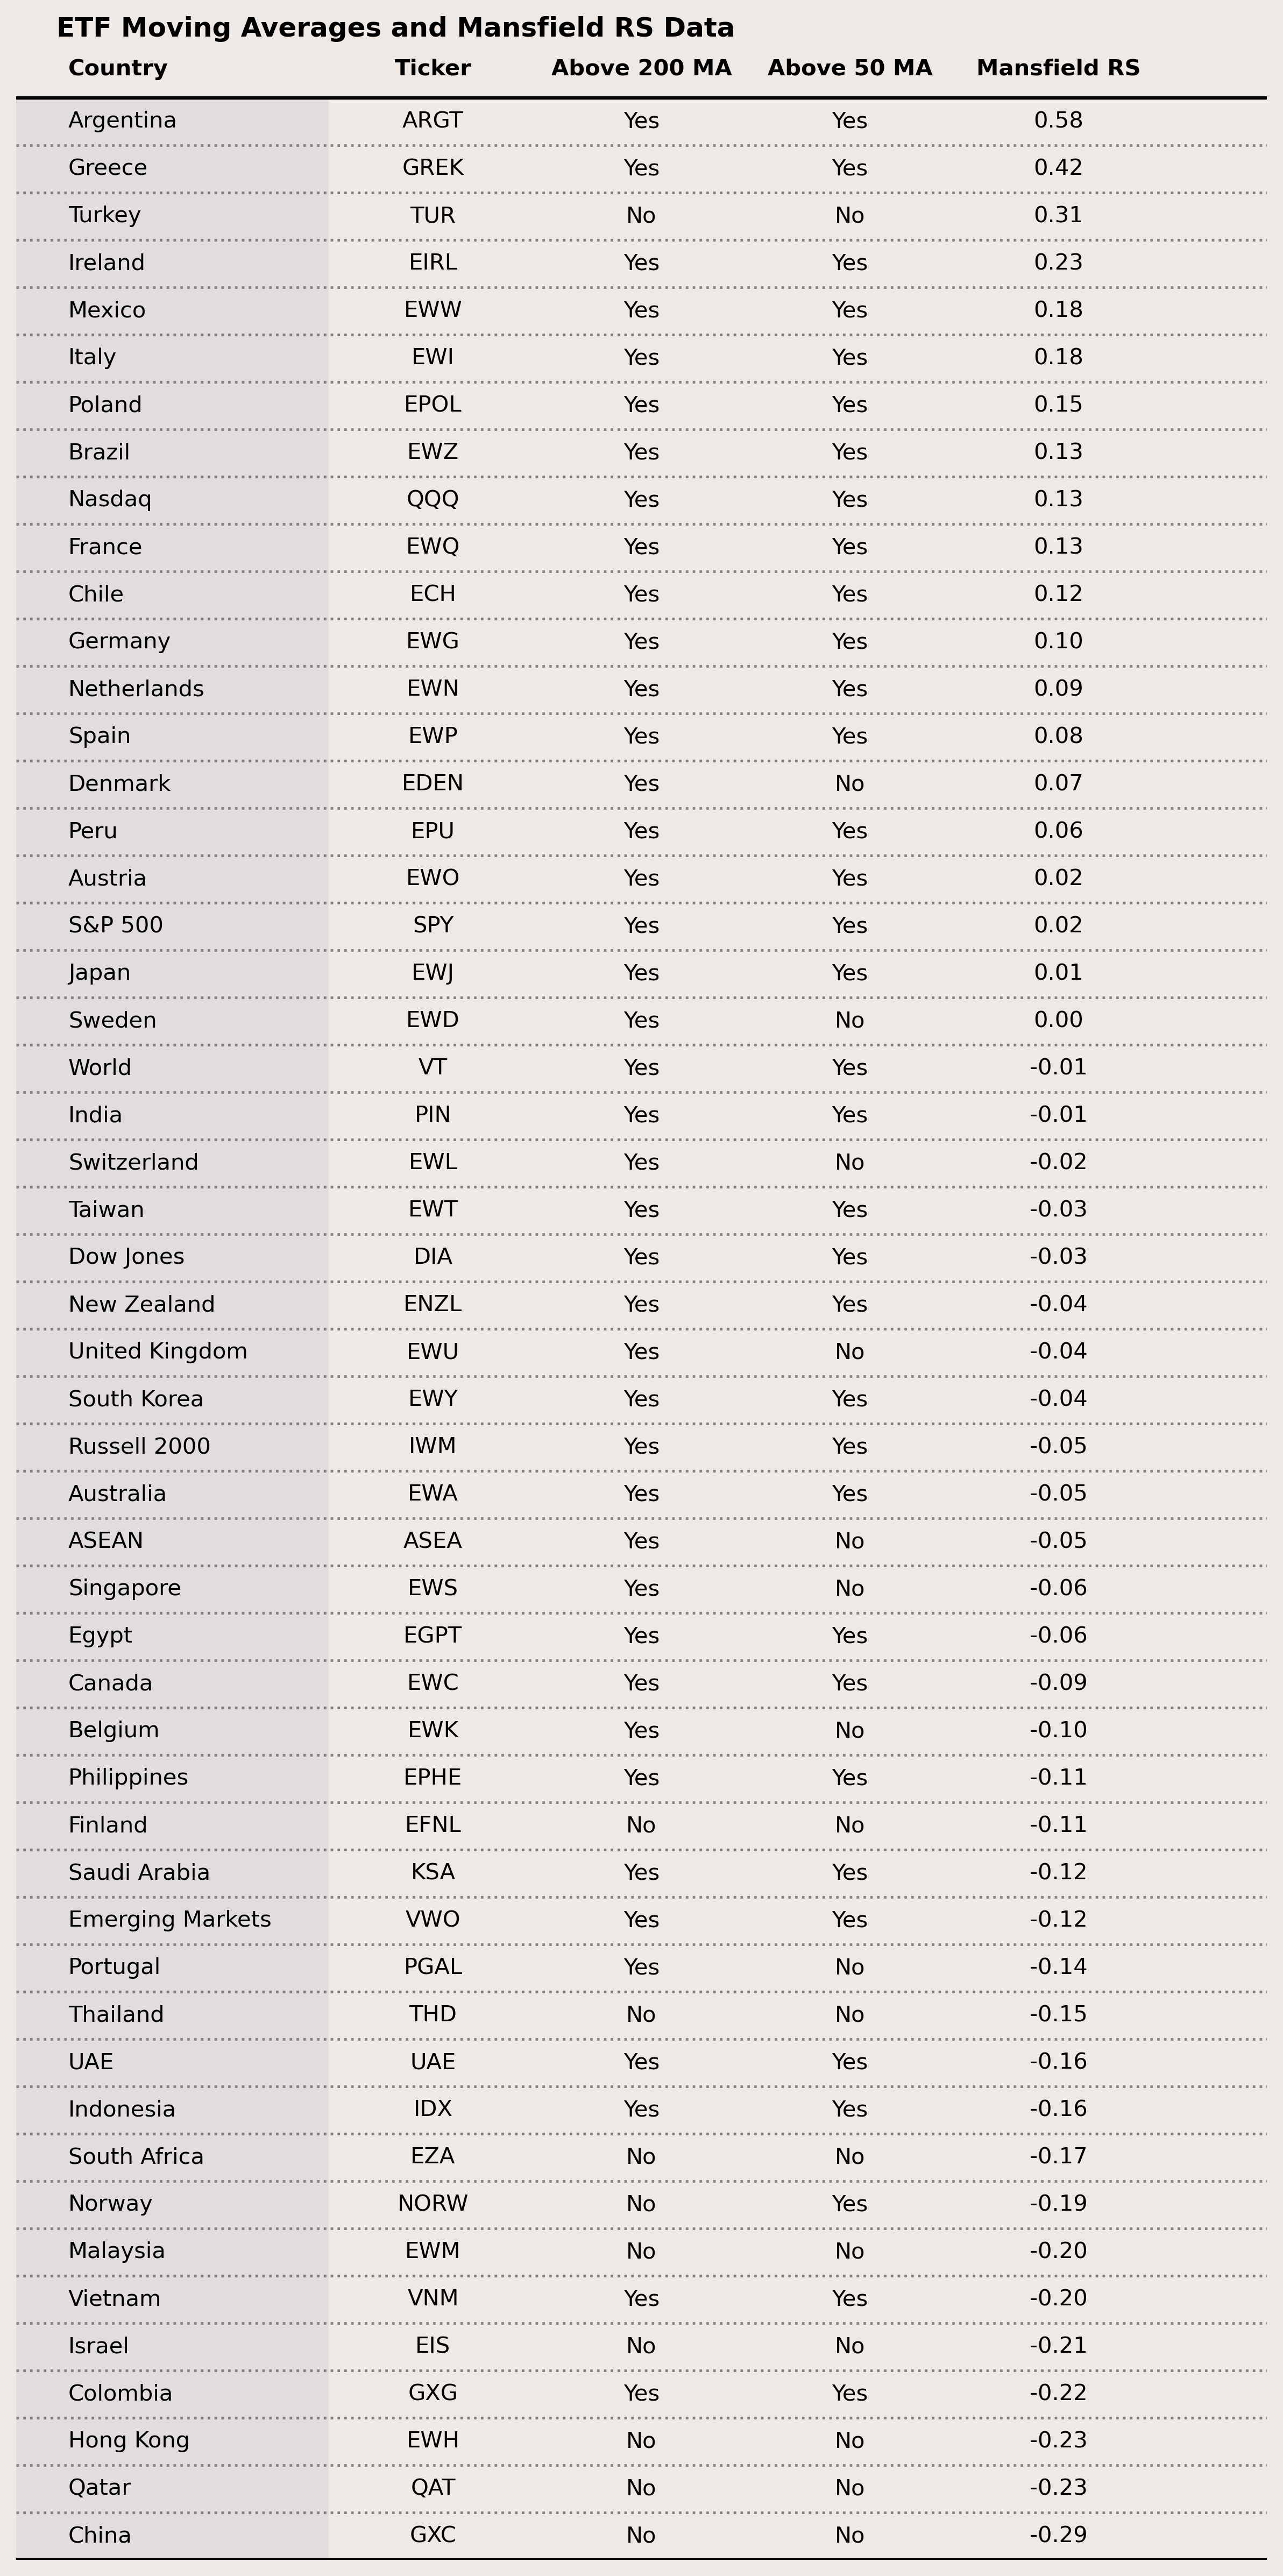

In [41]:
draw_table(df_combined)